In [69]:
import matplotlib.pyplot as plt

from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from ipywidgets import *
from IPython.display import display, Math, Latex
import schemdraw
import schemdraw.elements as elm

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [102]:
225-90

135

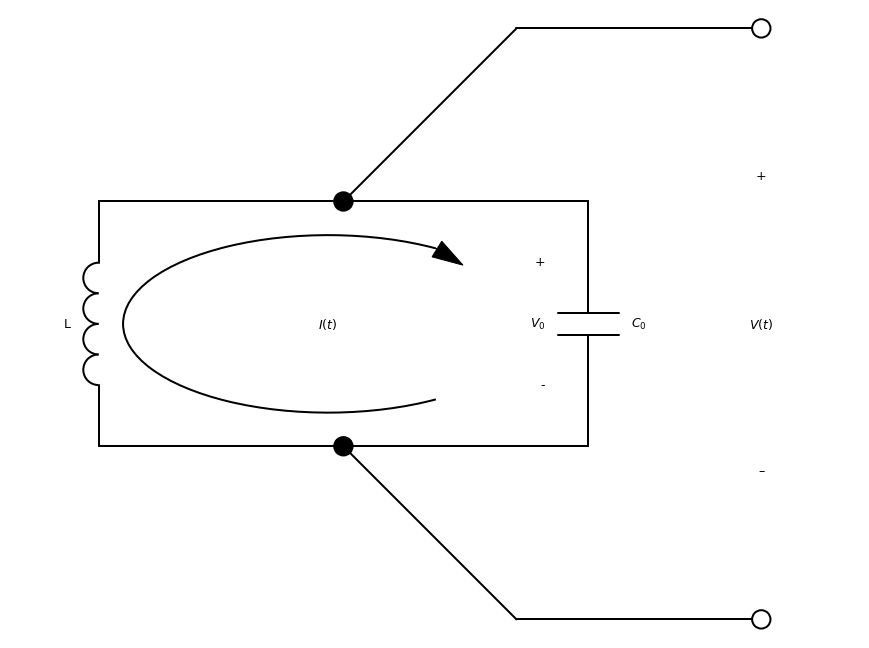

In [151]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d.push()
    d += (d1 := elm.Dot())
    d += (elm.Line().theta(45))
    d += (vp := elm.Line().right().dot(open=True))
    d.pop()
    d += (s2 := elm.Line())
    d += (c1 := elm.Capacitor().down().label(f'$C_{0}$', loc="bot").label(['+','$V_0$','-'], loc='top'))
    d += (s3 := elm.Line().left())
    d.push()
    d += (d2 := elm.Dot())
    d += elm.Line().theta(-45)
    d += (vg := elm.Line().right().dot(open=True))
    d += elm.Gap().label(('–','$V(t)$','+')).endpoints(vg.end, vp.end)
    d.pop()
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up().label(f'L', loc="top"))
    d += (s5 := elm.Line().right())
    d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label('$I(t)$')

In [6]:
display(Math(r'V(t) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

In [45]:
def simulate(V0 = 1, L=0.05, C=0.05):
    circuit = Circuit('LCCircuit')
    circuit.L(1, 'node_01', circuit.gnd, L@u_mH)
    circuit.C(1,'node_01',circuit.gnd, C@u_mF)
    Tf =3@u_ms
    T = 0.1@u_ms
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    simulator.initial_condition(node_01 = V0@u_V)
    analysis = simulator.transient(step_time=T/10, end_time=Tf)
    fig, ax1 = plt.subplots()
    ax1.set_title(f'I(t)&V(t) @V0={V0}, C={C}, L={L}')
    ax1.set_xlabel('Time in ms')
    # ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax1.plot(analysis.nodes['node_01']) #bug with voltages vs currents
    ax1.set_ylabel('A')
    color = 'tab:blue'
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.plot(analysis.branches['l1'], 'r') #bug with voltages vs currents
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylabel('V')
    a,b = -5e10,5e10
    ax1.set_ylim(a,b)
    ax2.set_ylim(a,b)
    # ax1.show()

    
interact(simulate, V0=(1,5,0.01), C=(0.1, 0.5, 0.01), L=(0.1, 0.5, 0.01))

interactive(children=(FloatSlider(value=1.0, description='V0', max=5.0, min=1.0, step=0.01), FloatSlider(value…

<function __main__.simulate(V0=1, L=0.05, C=0.05)>